In [ ]:
!pip install -U scopyon

In [2]:
import numpy
import os.path

In [3]:
from ecell4 import *
from ecell4_base.core import *
from ecell4_base import *

In [4]:
with species_attributes():
    X | {'D': 0.1e-12, 'location': 'M', 'dimension': 2}
    M | {'dimension': 2}

m = get_model()

show(m)

X|{'location': 'M', 'dimension': <ecell4_base.core.Quantity object at 0x154dce9f4128>, 'D': <ecell4_base.core.Quantity object at 0x154dce9f4198>}
M|{'dimension': <ecell4_base.core.Quantity object at 0x154dce9f4198>}


In [5]:
f = spatiocyte.Factory(0.01e-6)

w = f.world(Real3(0.1e-6, 35e-6, 35e-6))
edge_lengths = w.edge_lengths()
w.bind_to(m)

w.add_structure(Species('M'), PlanarSurface(Real3(0.05e-6, 0, 0), unity(), unitz()))
w.add_molecules(Species('X'), 2400)

a coordinate, an index,
        a serial and lot of a molecule ID, a fluorophore ID,
        p_state (defaults to 1) and cyc_id (defaults to `inf`).

In [6]:
from scopyon.config import Config
from scopyon.epifm import EPIFMSimulator
from scopyon.image import convert_8bit, save_image

In [7]:
!curl -LO https://github.com/ecell/scopyon/raw/master/examples/defaults.ini

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   142  100   142    0     0    250      0 --:--:-- --:--:-- --:--:--   250
100  2075  100  2075    0     0   2777      0 --:--:-- --:--:-- --:--:--  2777


In [8]:
rndseed = 0

exposure_time = 33e-3
t0, t1 = 0.0, exposure_time * 2
cmin, cmax = 1900, 2500
low, high = 0, 255

lower = numpy.array([0.0, 0.0, 0.0])
upper = numpy.array([0.0, 50033.2e-9, 50060e-9])
lengths = upper - lower 
dt = exposure_time

In [9]:
shift = [0.0, lower[1] + (lengths[1] - edge_lengths[1]) * 0.5, lower[2] + (lengths[2] - edge_lengths[2]) * 0.5]

In [10]:
points = numpy.array([
    [shift[0], p.position()[1] + shift[1], p.position()[2] + shift[2], pid.serial(), pid.lot(), 1, 1, numpy.inf]
    for pid, p in w.list_particles(Species('X'))])
print(points)

[[0.00000000e+00 1.21474625e-05 4.02100000e-05 ... 1.00000000e+00
  1.00000000e+00            inf]
 [0.00000000e+00 2.93467270e-05 1.51600000e-05 ... 1.00000000e+00
  1.00000000e+00            inf]
 [0.00000000e+00 2.27822545e-05 1.23900000e-05 ... 1.00000000e+00
  1.00000000e+00            inf]
 ...
 [0.00000000e+00 1.43471670e-05 3.45600000e-05 ... 1.00000000e+00
  1.00000000e+00            inf]
 [0.00000000e+00 2.75280737e-05 2.52500000e-05 ... 1.00000000e+00
  1.00000000e+00            inf]
 [0.00000000e+00 1.34638211e-05 2.50300000e-05 ... 1.00000000e+00
  1.00000000e+00            inf]]


In [11]:
t = t0
input_data = [(t, points)]

In [12]:
config = Config(os.path.abspath('defaults.ini'))
config.set_epifm_shutter(start_time=0, end_time=t1)
config.set_epifm_detector(exposure_time=exposure_time)

rng = numpy.random.RandomState(rndseed)

sim = EPIFMSimulator(config, rng=rng)

/home/kaizu/.local/share/virtualenvs/python-eSbFG-Wg/lib/python3.6/site-packages/scopyon/epifm.py:209: UserWarning: The given wave length [600] was ignored
  warnings.warn('The given wave length [{}] was ignored'.format(wave_length))


In [13]:
camera, true_data = sim.output_frame(input_data, 0, rng=rng)

In [14]:
bytedata = convert_8bit(camera[: , : , 1], cmin, cmax, low, high)
save_image('samples_%07d.png' % (0), bytedata, low=low, high=high)

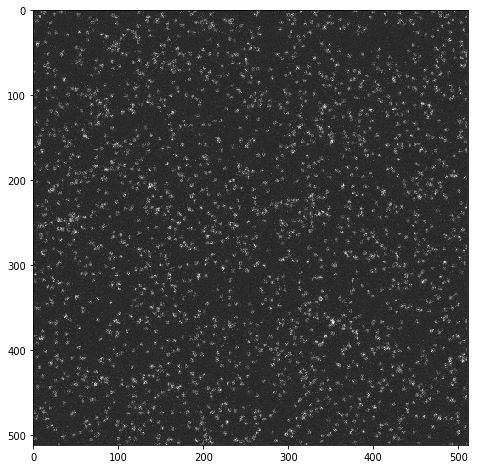

In [15]:
%matplotlib inline
import numpy
from PIL import Image
import matplotlib.pylab as plt

im = Image.open('samples_0000000.png')
plt.figure(figsize=(8, 8))
plt.imshow(numpy.array(im))
#plt.show()